<a href="https://colab.research.google.com/github/Shmaden/A01411206/blob/main/Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Javier Emmanuel García Escobedo
*   MATRÍCULA: A01411206

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/Assignment 5"
os.chdir(DIR)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [ ]:
df_info = response_df.info()
numerical_vars = response_df.select_dtypes(include=['number']).columns
text_vars = response_df.select_dtypes(include=['object']).columns
num_numerical_vars = len(numerical_vars)
num_text_vars = len(text_vars)
print(f'Número de variables numéricas: {num_numerical_vars}')
print(f'Número de variables de texto: {num_text_vars}')
numerical_describe = response_df[numerical_vars].describe()
text_describe = response_df[text_vars].describe()

# Mostrar resultados
print("Estadísticas descriptivas para variables numéricas:")
print(numerical_describe)

print("Estadísticas descriptivas para variables de texto:")
print(text_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
Número de variables numéricas: 139
Número de variables de texto: 11
Estadísticas descriptivas para variables numéricas:
             Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  

2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


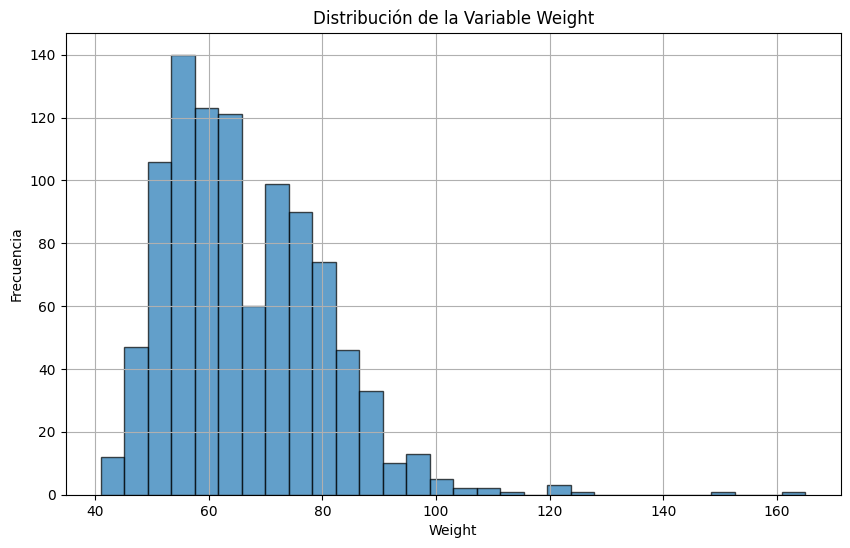

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(response_df['Weight'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de la Variable Weight')
plt.xlabel('Weight')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [ ]:
weight_skewness = stats.skew(response_df['Weight'].dropna())
print(f"Asimetría de la variable Weight: {weight_skewness}")

Asimetría de la variable Weight: 1.2218702827632462


4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [ ]:
missing_values = response_df['Weight'].isnull().sum()

total_values = len(response_df['Weight'])
missing_percentage = (missing_values / total_values) * 100

print(f"Número de valores faltantes en la variable Weight: {missing_values}")
print(f"Porcentaje de valores faltantes en la variable Weight: {missing_percentage:.2f}%")

Número de valores faltantes en la variable Weight: 20
Porcentaje de valores faltantes en la variable Weight: 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [ ]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [ ]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [ ]:
median_weight = response_df['Weight'].median()
response_df['Weight'].fillna(median_weight, inplace=True)
missing_values_after = response_df['Weight'].isnull().sum()

print(f"Mediana de la variable Weight: {median_weight}")
print(f"Número de valores faltantes en la variable Weight después de la imputación: {missing_values_after}")

Mediana de la variable Weight: 64.0
Número de valores faltantes en la variable Weight después de la imputación: 0


7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

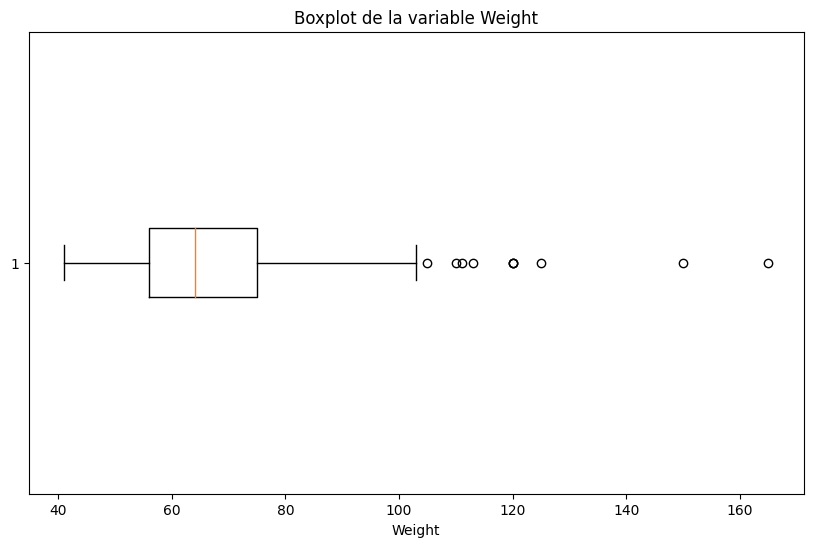

Número de valores atípicos en la variable Weight: 10
Valores atípicos almacenados en el dataframe 'outliers_df'.
     Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
292    5.0                       4.0    5.0   2.0      3.0              2.0   
612    5.0                       3.0    5.0   1.0      1.0              3.0   
715    4.0                       3.0    2.0   3.0      3.0              3.0   
793    2.0                       3.0    3.0   1.0      2.0              3.0   
796    3.0                       5.0    3.0   2.0      2.0              4.0   

     Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
292      5.0  5.0   4.0                1.0  ...  21.0   184.0   120.0   
612      2.0  3.0   4.0                3.0  ...  23.0   172.0   110.0   
715      4.0  2.0   5.0                5.0  ...  29.0   183.0   111.0   
793      3.0  3.0   2.0                4.0  ...  24.0   185.0   120.0   
796      3.0  5.0   1.0                4.0  ...

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(response_df['Weight'].dropna(), vert=False)
plt.title('Boxplot de la variable Weight')
plt.xlabel('Weight')
plt.show()

Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = response_df[(response_df['Weight'] < lower_bound) | (response_df['Weight'] > upper_bound)]
outliers_df = outliers.copy()
df_cleaned = response_df[~((response_df['Weight'] < lower_bound) | (response_df['Weight'] > upper_bound))]
num_outliers = len(outliers_df)
print(f"Número de valores atípicos en la variable Weight: {num_outliers}")
print("Valores atípicos almacenados en el dataframe 'outliers_df'.")

print(outliers_df.head())

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

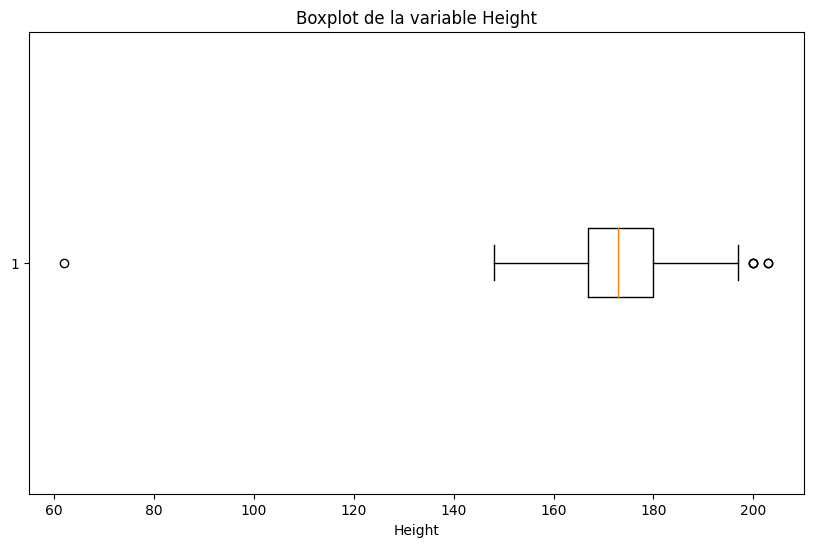

Número de valores atípicos en la variable Height: 6
Valores atípicos almacenados en el dataframe 'outliers_df'.
     Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
97     5.0                       3.0    2.0   1.0      1.0              1.0   
220    5.0                       3.0    4.0   3.0      3.0              4.0   
547    5.0                       4.0    1.0   4.0      2.0              5.0   
676    5.0                       4.0    2.0   2.0      1.0              2.0   
799    5.0                       3.0    1.0   2.0      3.0              4.0   

     Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
97       1.0  2.0   1.0                1.0  ...  19.0   200.0    75.0   
220      2.0  1.0   3.0                1.0  ...  18.0   200.0    90.0   
547      3.0  1.0   4.0                5.0  ...  21.0   203.0    80.0   
676      2.0  1.0   2.0                2.0  ...  20.0    62.0    55.0   
799      5.0  2.0   4.0                5.0  ... 

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(response_df['Height'].dropna(), vert=False)
plt.title('Boxplot de la variable Height')
plt.xlabel('Height')
plt.show()

Q1 = response_df['Height'].quantile(0.25)
Q3 = response_df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = response_df[(response_df['Height'] < lower_bound) | (response_df['Height'] > upper_bound)]

outliers_df = outliers.copy()

df_cleaned = response_df[~((response_df['Height'] < lower_bound) | (response_df['Height'] > upper_bound))]

num_outliers = len(outliers_df)
print(f"Número de valores atípicos en la variable Height: {num_outliers}")
print("Valores atípicos almacenados en el dataframe 'outliers_df'.")

print(outliers_df.head())

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

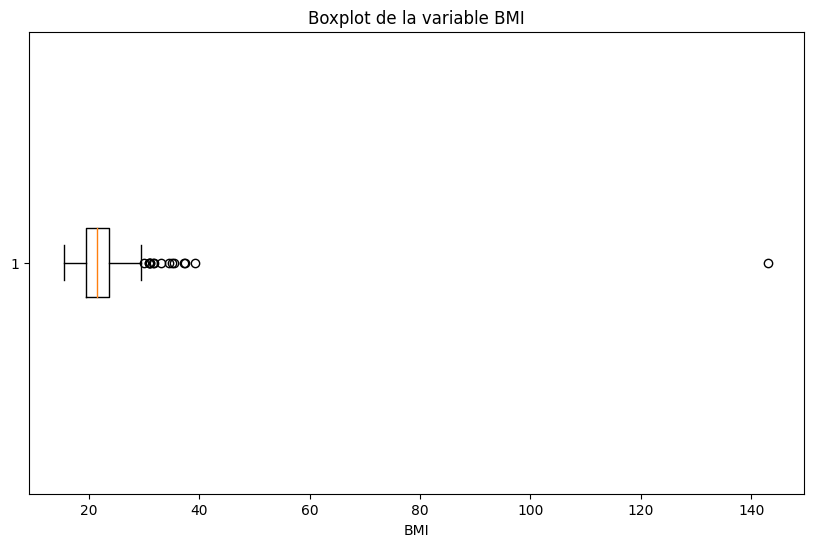

Número de valores atípicos en la variable BMI: 15
Valores atípicos almacenados en el dataframe 'bmi_outliers_df'.
     Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
42     5.0                       5.0    2.0   2.0      2.0              3.0   
151    5.0                       4.0    3.0   1.0      1.0              3.0   
156    5.0                       4.0    2.0   4.0      3.0              4.0   
292    5.0                       4.0    5.0   2.0      3.0              2.0   
357    5.0                       4.0    3.0   1.0      1.0              2.0   

     Musical  Pop  Rock  Metal or Hardrock  ...  Weight  Number of siblings  \
42       4.0  5.0   5.0                4.0  ...    90.0                 0.0   
151      2.0  2.0   4.0                4.0  ...   100.0                 1.0   
156      2.0  3.0   5.0                2.0  ...    97.0                 1.0   
292      5.0  5.0   4.0                1.0  ...   120.0                 1.0   
357      2.0  2.

In [ ]:
response_df['Height_m'] = response_df['Height'] / 100
response_df['BMI'] = response_df['Weight'] / response_df['Height_m'] ** 2

plt.figure(figsize=(10, 6))
plt.boxplot(response_df['BMI'].dropna(), vert=False)
plt.title('Boxplot de la variable BMI')
plt.xlabel('BMI')
plt.show()

Q1 = response_df['BMI'].quantile(0.25)
Q3 = response_df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

bmi_outliers = response_df[(response_df['BMI'] < lower_bound) | (response_df['BMI'] > upper_bound)]
bmi_outliers_df = bmi_outliers.copy()

df_cleaned = response_df[~((response_df['BMI'] < lower_bound) | (response_df['BMI'] > upper_bound))]

# Resultados
num_bmi_outliers = len(bmi_outliers_df)
print(f"Número de valores atípicos en la variable BMI: {num_bmi_outliers}")
print("Valores atípicos almacenados en el dataframe 'bmi_outliers_df'.")

# Mostrar los primeros 5 valores atípicos
print(bmi_outliers_df.head())

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

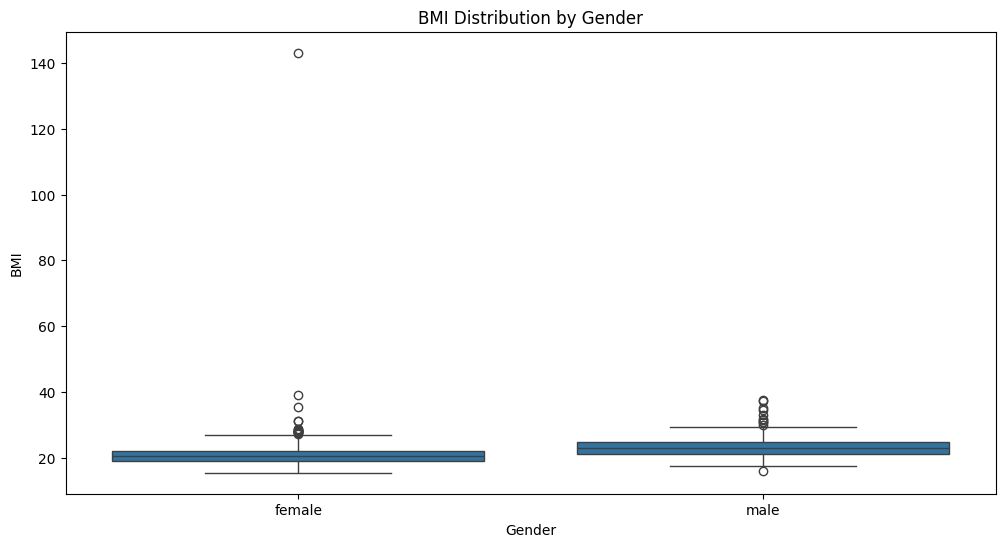

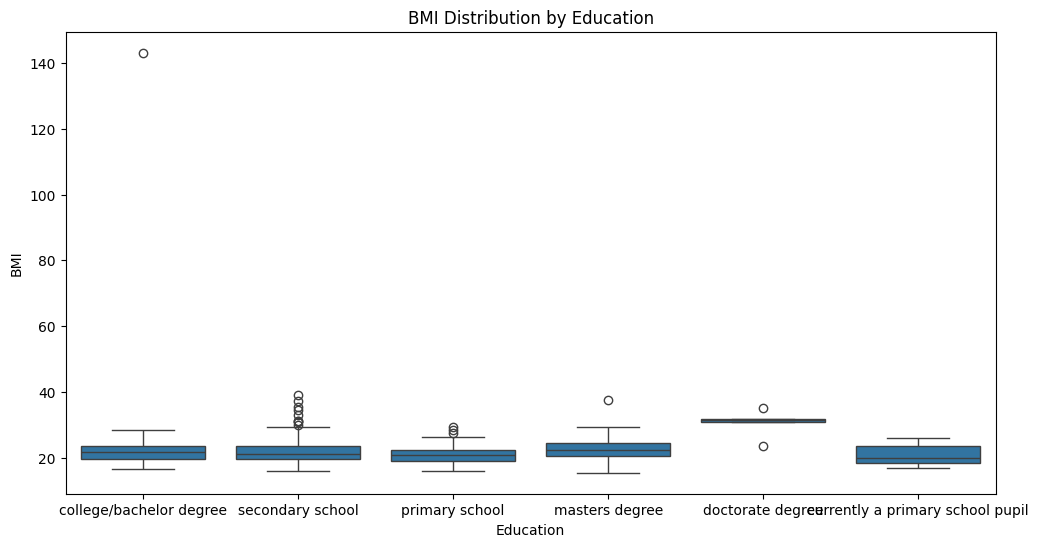


Como se puede observar, es más la tendencia de las mujeres de tener un mayor
BMI, mientras que el género masculino se mantiene más estable o incluso más bajo, 
lo que indica un mayor nivel de salud en hombres. 

En cuanto a el nivel escolar, se puede observar que se presenta un mayor BMI
en las escuelas secundarias, lo que indica que durante ese grado de estudios, se
tiende a descuidar más la salud.



In [ ]:
response_df['Height_m'] = response_df['Height'] / 100
response_df['BMI'] = response_df['Weight'] / response_df['Height_m'] ** 2
categorical_vars = ['Gender', 'Education']

for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='BMI', data=response_df)
    plt.title(f'BMI Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('BMI')
    plt.show()

print(
"""
Como se puede observar, es más la tendencia de las mujeres de tener un mayor
BMI, mientras que el género masculino se mantiene más estable o incluso más bajo,
lo que indica un mayor nivel de salud en hombres.

En cuanto a el nivel escolar, se puede observar que se presenta un mayor BMI
en las escuelas secundarias, lo que indica que durante ese grado de estudios, se
tiende a descuidar más la salud.
"""
)
